## E3 Fundamentals of Visualization libraries Part 1 ß Matplotlib

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import os

In [14]:
import matplotlib
matplotlib.__version__

'3.7.1'

In [15]:
os.getcwd()

'/Users/woodoooo/New-York-s-CitiBike-trips-in-2022/03 Scripts'

In [16]:
df = pd.read_pickle(r'../02 Data/df_merged.pkl')

In [17]:
df.shape

(29806700, 17)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29806700 entries, 0 to 29806699
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    category      
 6   end_station_name    category      
 7   end_station_id      category      
 8   start_lat           float32       
 9   start_lng           float32       
 10  end_lat             float32       
 11  end_lng             float32       
 12  member_casual       category      
 13  month               object        
 14  date                datetime64[ns]
 15  avgTemp             float64       
 16  _merge              category      
dtypes: category(7), datetime64[ns](3), float32(4), float64(1), object(2)
memory usage: 2.3+ GB


In [19]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'month', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [20]:
df.drop(columns = {'_merge'}, inplace=True)

In [21]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,date,avgTemp
0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663658,-73.963013,40.668133,-73.973640,casual,August,2022-08-27,27.8
1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717796,-73.993164,40.729538,-73.984268,casual,August,2022-08-20,27.9
2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735355,-74.004829,40.721699,-74.002380,member,August,2022-08-31,25.6
3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.10,40.744221,-73.971214,40.764397,-73.973717,member,August,2022-08-02,26.4
4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982117,40.730312,-73.980469,member,August,2022-08-25,28.1


In [23]:
df.dtypes

ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name          category
start_station_id            category
end_station_name            category
end_station_id              category
start_lat                    float32
start_lng                    float32
end_lat                      float32
end_lng                      float32
member_casual               category
month                         object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

### Basic plotting with pandas

In [24]:
df_temp = df.set_index('date')

In [25]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29806700 entries, 2022-08-27 to 2022-12-18
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    category      
 6   end_station_name    category      
 7   end_station_id      category      
 8   start_lat           float32       
 9   start_lng           float32       
 10  end_lat             float32       
 11  end_lng             float32       
 12  member_casual       category      
 13  month               object        
 14  avgTemp             float64       
dtypes: category(6), datetime64[ns](2), float32(4), float64(1), object(2)
memory usage: 2.1+ GB


In [26]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,avgTemp
date,,,,,,,,,,,,,,,
2022-08-27,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663658,-73.963013,40.668133,-73.973640,casual,August,27.8
2022-08-20,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717796,-73.993164,40.729538,-73.984268,casual,August,27.9
2022-08-31,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735355,-74.004829,40.721699,-74.002380,member,August,25.6
2022-08-02,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.10,40.744221,-73.971214,40.764397,-73.973717,member,August,26.4
2022-08-25,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982117,40.730312,-73.980469,member,August,28.1


# 03 Create a line plot of the temperatures for 2022 plotted as time series using the weather dataframe. For this example, use a pandas plotting function.

<Axes: xlabel='date'>

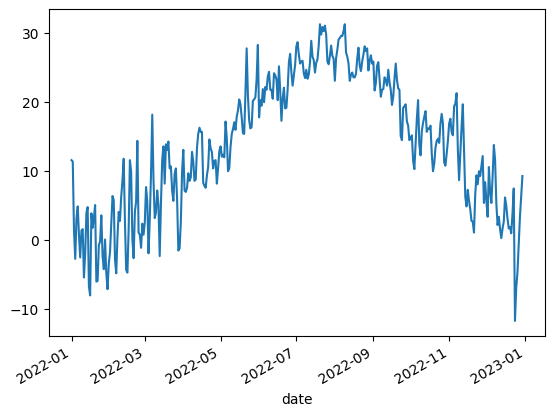

In [27]:
df_temp['avgTemp'].plot()

### Procedural approach

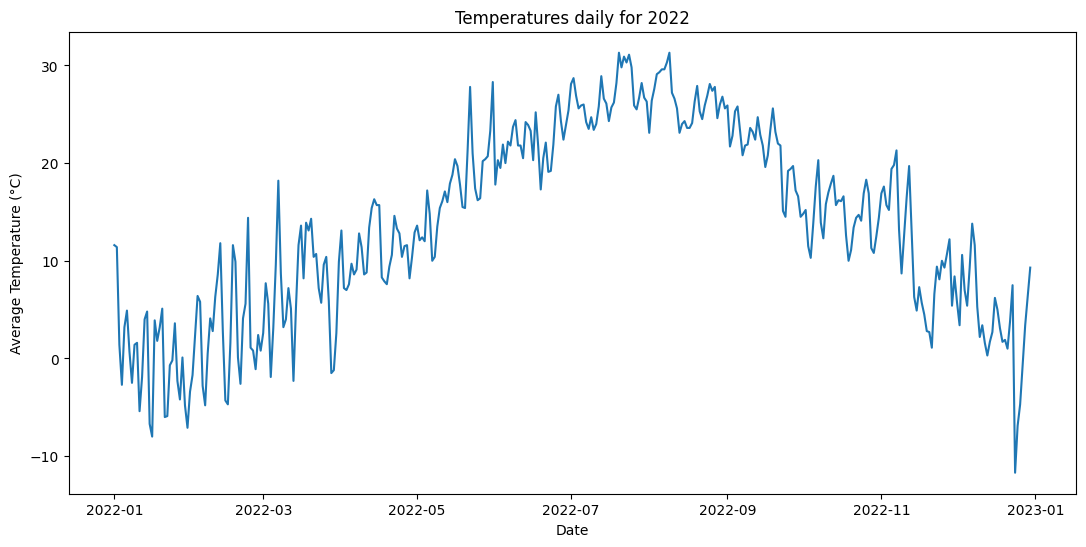

In [28]:
df_temp = df_temp.sort_index()
plt.figure(figsize=(13,6))
plt.title('Temperatures daily for 2022')
plt.plot(df_temp.index, df_temp['avgTemp'])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.show()

# 04 Create a column with the count of trips per day and merge it with the weather dataframe.

In [29]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'month', 'date', 'avgTemp'],
      dtype='object')

In [30]:
df_group_2 = pd.DataFrame(df.groupby(['month'])['ride_id'].count().sort_values(ascending=False))

In [32]:
df_group_2.head(12)

,ride_id
month,
August,3576182
September,3411909
July,3397722
June,3344145
October,2935959
May,2865301
November,2386350
April,2261339
March,1846035


In [33]:
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [34]:
df_group.head()

,date,ride_id
0,2022-01-01,20428
1,2022-01-02,43009
2,2022-01-03,33189
3,2022-01-04,36842
4,2022-01-05,34230


In [35]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace=True)

In [36]:
df = df.merge(df_group, on = 'date', how= 'outer', indicator=True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of February 1st is", df[df['date'] == '2018-02-01'].shape) # Check 
print("Shape of February 2nd is", df[df['date'] == '2018-02-02'].shape) # Second check 

both          29806700
left_only            0
right_only           0
Name: _merge, dtype: int64
Shape of February 1st is (0, 18)
Shape of February 2nd is (0, 18)


In [37]:
df_temp = df.set_index('date')

In [38]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'month', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')

In [39]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29806700 entries, 2022-08-27 to 2022-12-25
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    category      
 6   end_station_name    category      
 7   end_station_id      category      
 8   start_lat           float32       
 9   start_lng           float32       
 10  end_lat             float32       
 11  end_lng             float32       
 12  member_casual       category      
 13  month               object        
 14  avgTemp             float64       
 15  bike_rides_daily    int64         
 16  _merge              category      
dtypes: category(7), datetime64[ns](2), float32(4), float64(1), int64(1), object(2)
memory usage: 2.3+ GB


In [40]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,,
2022-08-27,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663658,-73.963013,40.668133,-73.973640,casual,August,27.8,117835,both
2022-08-27,81748F5BA904DFD2,classic_bike,2022-08-27 22:20:56.003,2022-08-27 22:25:39.250,E 15 St & 3 Ave,5863.07,Ave A & E 14 St,5779.11,40.734234,-73.986923,40.730312,-73.980469,casual,August,27.8,117835,both
2022-08-27,A697741A87C95690,classic_bike,2022-08-27 11:19:07.642,2022-08-27 11:26:19.188,E 5 St & Cooper Sq,5712.12,E 2 St & Avenue C,5476.03,40.727692,-73.990990,40.720875,-73.980858,member,August,27.8,117835,both
2022-08-27,81C36C45D6AD553A,electric_bike,2022-08-27 19:39:19.265,2022-08-27 20:02:51.369,Grand Concourse & E 161 St,8021.11,River Ave & E 151 St,7967.04,40.827133,-73.922737,40.822216,-73.928940,casual,August,27.8,117835,both
2022-08-27,B4237A2BDC864298,classic_bike,2022-08-27 22:32:36.359,2022-08-27 22:38:53.330,Grand Army Plaza & Central Park S,6839.10,W 51 St & Rockefeller Plaza,6700.14,40.764397,-73.973717,40.759739,-73.978119,casual,August,27.8,117835,both


In [41]:
df_temp.to_pickle('df_temp.pkl')

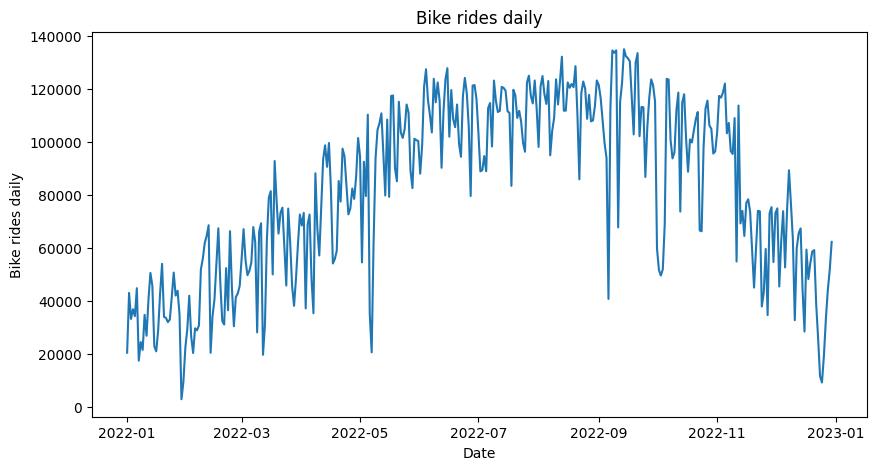

In [42]:
df_temp = df_temp.sort_index()
plt.figure(figsize=(10,5))
plt.title('Bike rides daily')
plt.plot(df_temp.index, df_temp['bike_rides_daily'])
plt.xlabel('Date')
plt.ylabel('Bike rides daily')
plt.show()

# 05 Create a line chart of bike trip counts and temperatures plotted on a dual axis.

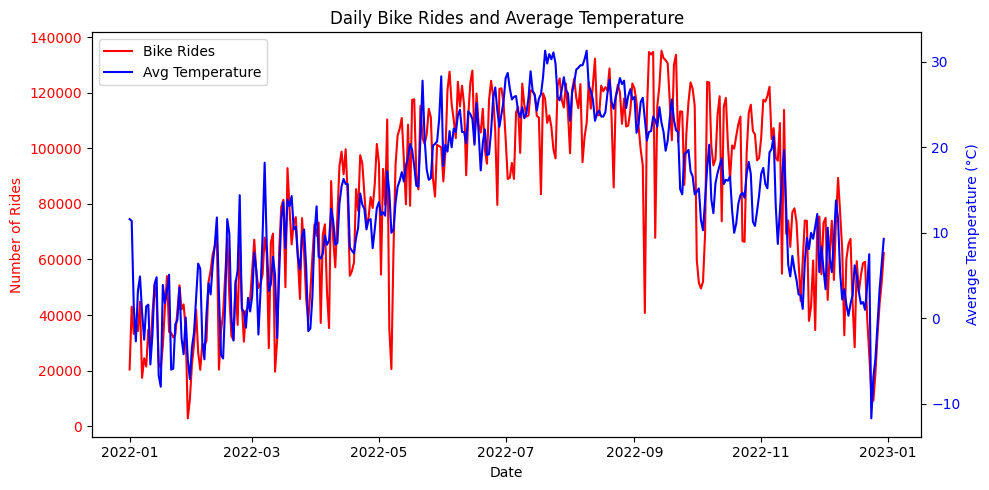

In [43]:
# Create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(10, 5))

# Sort the dataframe by the index (date) before plotting
df_temp = df_temp.sort_index()

# Make a plot of the bike rides on primary y-axis
ax.plot(df_temp.index, df_temp['bike_rides_daily'], color="red", label='Bike Rides')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Rides', color='red')
ax.tick_params(axis='y', labelcolor='red')

# Create a second y-axis for temperature
ax2 = ax.twinx()
ax2.plot(df_temp.index, df_temp["avgTemp"], color="blue", label='Avg Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title
ax.set_title('Daily Bike Rides and Average Temperature')

# Add legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In this code, I used Matplotlib’s object-oriented (OO) approach to create a dual-axis line chart that shows the relationship between daily bike rides and average temperature.

First, I created the figure and main axis using plt.subplots(), then sorted the dataframe by date to ensure the x-axis values appear chronologically. The first axis (ax) plots the number of daily bike rides in red, while the second axis (ax2), created with twinx(), shares the same x-axis but displays average temperature in blue on a separate y-axis.

Each axis has its own color-coded labels and tick marks for clarity. I also combined the legends from both axes and positioned them in the upper-left corner. Finally, tight_layout() ensures that all elements fit neatly within the figure.

This approach allows two variables with different scales to be compared visually on the same timeline.

# Create a histogram of the variable “tripduration” using matplotlib.

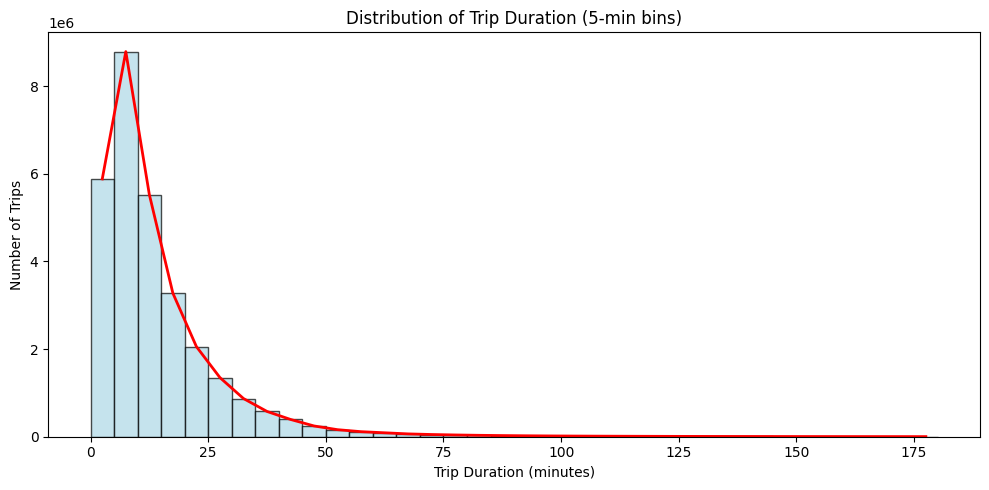

Total trips: 29806700
Trips under 180 minutes: 29694154 (99.6%)
Trips filtered out: 112546 (0.4%)


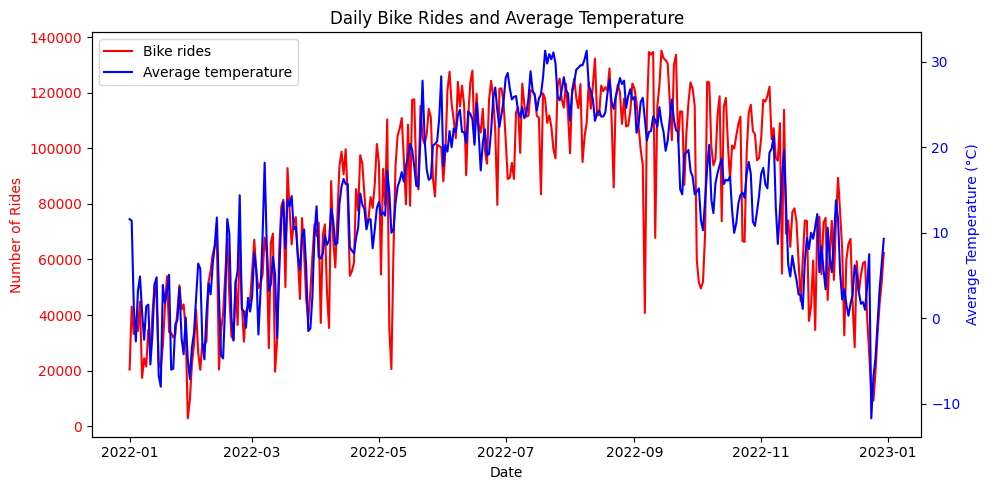

In [44]:
# Histogram of Trip Duration
# Convert trip duration to minutes
df_temp['tripduration_min'] = (df_temp['ended_at'] - df_temp['started_at']).dt.total_seconds() / 60

# Filter out unrealistic trip durations (e.g., keep only trips under 3 hours = 180 minutes)
df_filtered = df_temp[df_temp['tripduration_min'] <= 180].copy()

# Define bins every 5 minutes
bins = np.arange(0, 185, 5)  # 0 to 180 minutes in 5-minute bins

# Plot histogram
plt.figure(figsize=(10, 5))
plt.title('Distribution of Trip Duration (5-min bins)')
counts, bins, patches = plt.hist(
    df_filtered['tripduration_min'], 
    bins=bins, 
    color='lightblue', 
    edgecolor='black', 
    alpha=0.7
)

# Add red curve following bin centers
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bin_centers, counts, color='red', linewidth=2)

# Labels
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

# Optional: Print statistics about filtered data
print(f"Total trips: {len(df_temp)}")
print(f"Trips under 180 minutes: {len(df_filtered)} ({len(df_filtered)/len(df_temp)*100:.1f}%)")
print(f"Trips filtered out: {len(df_temp) - len(df_filtered)} ({(len(df_temp) - len(df_filtered))/len(df_temp)*100:.1f}%)")

# Plot: Rides vs. Temperature
# Sort by date index
df_temp_agg = df_temp.sort_index()

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot daily rides
ax.plot(df_temp_agg.index, df_temp_agg['bike_rides_daily'], color='red', label='Bike rides')

# Second y-axis for temperature
ax2 = ax.twinx()
ax2.plot(df_temp_agg.index, df_temp_agg['avgTemp'], color='blue', label='Average temperature')

# Titles and labels
ax.set_title('Daily Bike Rides and Average Temperature')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Rides', color='red')
ax2.set_ylabel('Average Temperature (°C)', color='blue')

# Color the y-axis tick labels to match the lines
ax.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legends
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

fig.tight_layout()
plt.show()

# Create a figure with two axes that represent different plots: one of the plots is a bar chart with the variable “usertype,” and the other one is a pie chart illustrating the variable “gender.” Hint: you need to use the OO approach here; two axes don’t mean a dual axis. Read this article on suplots, axes, and figures for some useful information!§

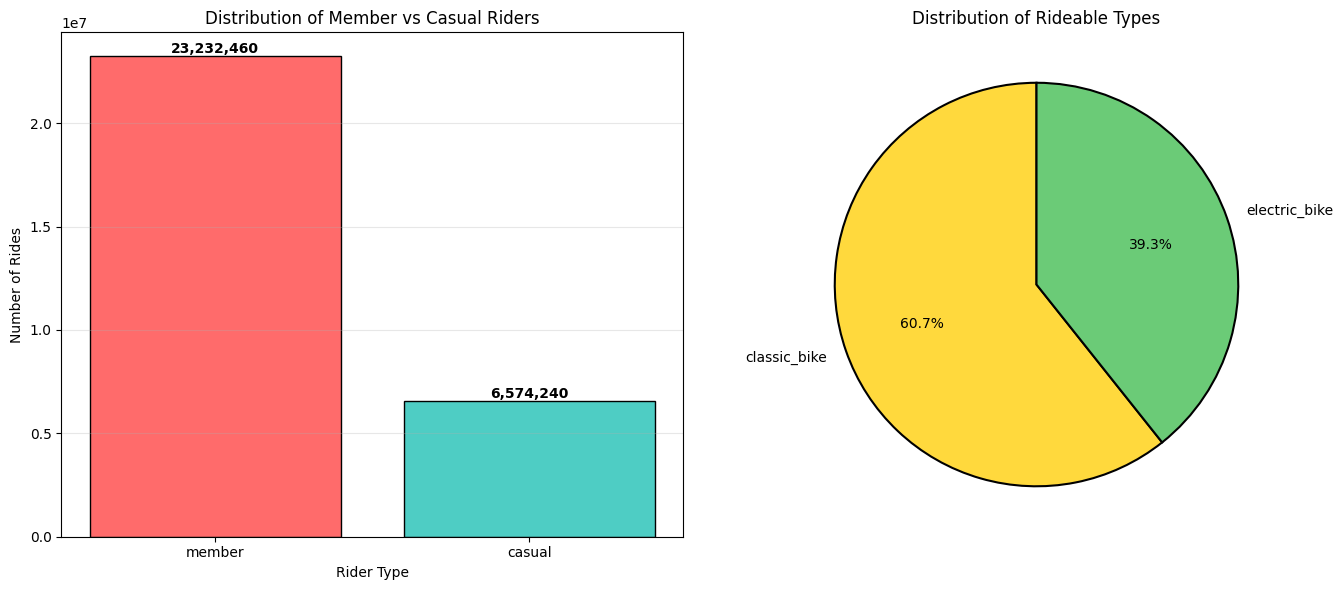

In [45]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left subplot: Bar chart for member_casual
member_counts = df_temp['member_casual'].value_counts()
axes[0].bar(member_counts.index, member_counts.values, color=['#FF6B6B', '#4ECDC4'], edgecolor='black')
axes[0].set_title('Distribution of Member vs Casual Riders')
axes[0].set_xlabel('Rider Type')
axes[0].set_ylabel('Number of Rides')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(member_counts.values):
    axes[0].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontweight='bold')

# Right subplot: Pie chart for rideable_type
rideable_counts = df_temp['rideable_type'].value_counts()
colors = ['#FFD93D', '#6BCB77', '#4D96FF']
axes[1].pie(rideable_counts.values, 
            labels=rideable_counts.index, 
            autopct='%1.1f%%',
            startangle=90,
            colors=colors,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
axes[1].set_title('Distribution of Rideable Types')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()